# Monty Hall

**Below is an example of an implementation of the Monty Hall game using native Python. It contains no comments.**

## Mission 1

After reviewing the code below, add both **unilinear** and **multilinear** comments to explain how it works to another developer.

In [1]:
import matplotlib.pyplot as plt
from random import choice

def play_one_game(strategy):
    """
    Simule une manche du jeu Monty Hall.
    Args:
        strategy (str): "change" si le participant décide de changer de porte, "keep" sinon.

    Returns:
        bool: True si le participant gagne le prix (voiture), False sinon.
    """

    doors = ['A', 'B', 'C']  # Liste des étiquettes des portes.
    correct_door = choice(doors)  # Attribue aléatoirement le prix derrière une des portes.
    first_choice = choice(doors)  # Le participant fait un premier choix aléatoire d'une porte.
    doors.remove(first_choice)  # Retire la porte initialement choisie de la liste.

    # Boucle pour déterminer quelle porte l'animateur ouvre pour montrer une chèvre.
    while True:
        hint_door = choice(doors)  # L'animateur choisit aléatoirement une porte parmi les restantes.
        if hint_door != correct_door:
            doors.remove(hint_door)  # L'animateur ouvre une porte, révélant une chèvre.
            break  # Sort de la boucle une fois une porte indice valide sélectionnée.

    # Détermine le deuxième choix du participant en fonction de sa stratégie.
    if strategy.lower() == "change":
        second_choice = choice(doors)  # Le participant change pour l'autre porte non ouverte.
    elif strategy.lower() == "keep":
        second_choice = first_choice  # Le participant reste avec son choix initial.
    else:
        raise ValueError("Strategy not recognized!")  # Erreur si une stratégie invalide est fournie.

    # Renvoie True si le choix final du participant est la bonne porte.
    return second_choice == correct_door



In [2]:
def play_many_games(strategy, nb_turns):
    """
    Simule plusieurs jeux du problème de Monty Hall.
    
    Args:
        strategy (str): Stratégie utilisée par le participant ("changer" ou "garder").
        nb_turns (int): Nombre de jeux à simuler.

    Returns:
        int: Le nombre de victoires pour la stratégie choisie.
    """
    liste = [play_one_game(strategy) for i in range(nb_turns)]
    return sum(liste)  # Additionne les valeurs True (1) pour compter les victoires.

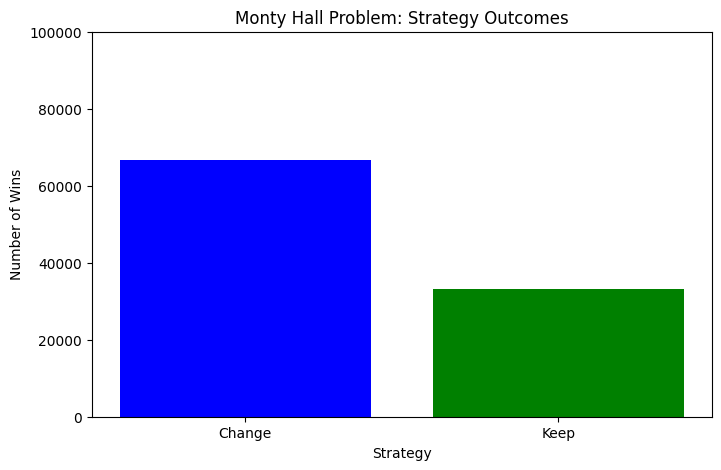

In [3]:
# Exemple d'exécution de la simulation et de création d'un graphique des résultats
num_trials = 100000
change_wins = play_many_games("change", num_trials)
keep_wins = play_many_games("keep", num_trials)

# Utilisation de matplotlib pour créer un graphique à barres simple des résultats.
plt.figure(figsize=(8, 5))
plt.bar(['Change', 'Keep'], [change_wins, keep_wins], color=['blue', 'green'])
plt.title('Monty Hall Problem: Strategy Outcomes')
plt.xlabel('Strategy')
plt.ylabel('Number of Wins')
plt.ylim(0, num_trials)
plt.show()

In [4]:
from random import choice
def montyHall(strategie):
  portes = ["A","B", "C"]
  bonnePorte = choice(portes)
  premierChoix = choice(portes)
  portes.remove(premierChoix)
  if premierChoix == bonnePorte:
    portes.pop(0)
  else:
    portes = [bonnePorte]
  if strategie.lower() == "changer":
    deuxiemeChoix = portes[0]
  elif strategie.lower() == "garder":
    deuxiemeChoix = premierChoix
  return deuxiemeChoix == bonnePorte

def jouerDesParties(strategie, nombreDeParties):
  return [montyHall(strategie) for i in range(nombreDeParties)]

In [5]:
play_many_games("change", 100000)

66582

In [6]:
keep_wins

33090

In [7]:
play_many_games("keep", 100000)

33178

In [8]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({"strategie" : ["changer", "garder"], "resultat" : [66740, 33609]})
df

,strategie,resultat
0,changer,66740
1,garder,33609


In [9]:
px.bar(df, x="strategie", y="resultat")

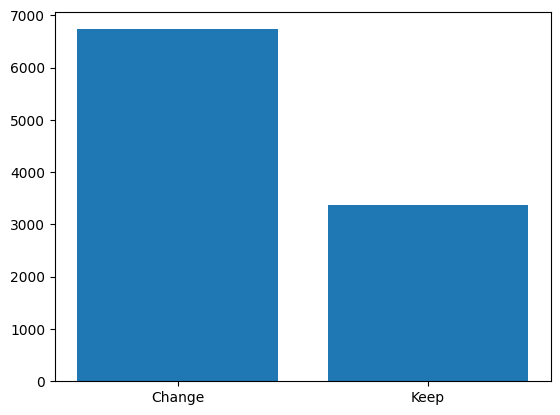

In [10]:
plt.bar([1, 2],
        [play_many_games("change", 10000), play_many_games("keep", 10000)],
        tick_label=["Change", "Keep"])
plt.show()


# Mission 2

To make sure you understood the code, in a new cell, change up the code in mission 1 to add a third bar, corresponding to a new strategy called **Alternate**.

A player following it will alternate **randomly** between "Change" and "Keep".


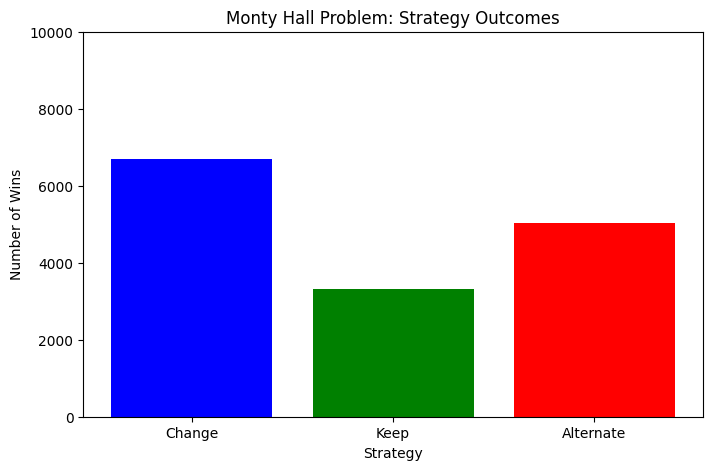

In [11]:
import matplotlib.pyplot as plt
from random import choice

def play_one_game(strategy):
    """
    Simulates one round of the Monty Hall game, incorporating an 'Alternate' strategy.
    Args:
        strategy (str): "change", "keep", or "alternate" for the contestant's decision strategy.
    Returns:
        bool: True if the contestant wins the prize (car), False otherwise.
    """
    doors = ['A', 'B', 'C']
    correct_door = choice(doors)
    first_choice = choice(doors)
    doors.remove(first_choice)

    while True:
        hint_door = choice(doors)
        if hint_door != correct_door:
            doors.remove(hint_door)
            break

    if strategy.lower() == "change":
        second_choice = choice(doors)
    elif strategy.lower() == "keep":
        second_choice = first_choice
    elif strategy.lower() == "alternate":
        # Randomly chooses between keeping or changing the door
        if choice([True, False]):
            second_choice = choice(doors)  # Change
        else:
            second_choice = first_choice  # Keep
    else:
        raise ValueError("Strategy not recognized!")

    return second_choice == correct_door

def play_many_games(strategy, nb_turns):
    """
    Simulates multiple games of the Monty Hall problem for a given strategy.
    Args:
        strategy (str): Strategy used by the contestant.
        nb_turns (int): Number of games to simulate.
    Returns:
        int: The number of wins.
    """
    results = [play_one_game(strategy) for i in range(nb_turns)]
    return sum(results)

# Simulation parameters
num_trials = 10000
change_wins = play_many_games("change", num_trials)
keep_wins = play_many_games("keep", num_trials)
alternate_wins = play_many_games("alternate", num_trials)  # Simulate the Alternate strategy

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(['Change', 'Keep', 'Alternate'], [change_wins, keep_wins, alternate_wins], color=['blue', 'green', 'red'])
plt.title('Monty Hall Problem: Strategy Outcomes')
plt.xlabel('Strategy')
plt.ylabel('Number of Wins')
plt.ylim(0, num_trials)
plt.show()


# Mission 3

Now, re-code the Monty Hall game using NumPy. **Do not use Python lists, the built-in `random` module, or any for or while loops in the code**. NumPy contains all the mechanisms you need to achieve the same result.

Finally, combine the 2 functions, `play_one_game` and `play_many_games`. In other words, **your NumPy program should now contain only one function**. Obviously, **the visual should be the same as in mission 2**.

In [12]:
import numpy as np

In [13]:
def monty_hall_game(strategy, num_games):
    """
    Simulates multiple Monty Hall games using NumPy.
    
    Args:
        strategy (str): Strategy to use, "change", "keep", or "alternate".
        num_games (int): Number of games to simulate.
    
    Returns:
        int: Number of games won using the specified strategy.
    """
    doors = np.array(['A', 'B', 'C'])
    
    # Generate random choices for the correct door, first choice, and strategy if alternating
    correct_doors = np.random.choice(doors, num_games)
    first_choices = np.random.choice(doors, num_games)
    alternate_strategies = np.random.choice(['change', 'keep'], num_games)

    # Determine second choice based on strategy
    if strategy == 'alternate':
        second_choices = np.where(alternate_strategies == 'change', np.random.choice(doors, num_games), first_choices)
    elif strategy == 'change':
        # Choose a door that is not the first choice (vectorized approach)
        second_choices = np.array([np.random.choice(list(set(doors) - {fc})) for fc in first_choices])
    elif strategy == 'keep':
        second_choices = first_choices
    else:
        raise ValueError("Invalid strategy specified.")

    # Calculate the number of wins
    wins = np.sum(second_choices == correct_doors)
    
    return wins



In [14]:
num_trials = 10000
change_wins = monty_hall_game('change', num_trials)
keep_wins = monty_hall_game('keep', num_trials)
alternate_wins = monty_hall_game('alternate', num_trials)

print(f"Change strategy wins: {change_wins}")
print(f"Keep strategy wins: {keep_wins}")
print(f"Alternate strategy wins: {alternate_wins}")

Change strategy wins: 3317
Keep strategy wins: 3360
Alternate strategy wins: 3366
